<a href="https://colab.research.google.com/github/MichelLLIUU/M1S1-ML-PROJET/blob/main/M1S1_ML_PROJET_LIU_Tianyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Problem Description: Predicting the Success of Bank Telemarketing Campaigns**

The purpose of this project is to predict the success of a bank's telemarketing campaign based on the customer's personal information and previous communication with the bank, i.e. whether the customer will subscribe to the bank's term deposit


2. **Task type**

This is a classification problem where the goal is to predict whether a customer will subscribe (y = ‘yes’) or will not subscribe (y = ‘no’).


3. **Data description**

Project data from`‘bank-full’` file in https://archive.ics.uci.edu/dataset/222/bank+marketing.

The file mainly contains ‘data types’, e.g. age, balance, ‘non-data types’, e.g. partial, and ‘binary types’, e.g.: housing, etc.



**(1) Feature Variables**

| Feature Name | Description | Data Type |
|----------|----------------------|------------|
| **`age`** | Age of customer | `int` |
| **`job`** | Occupation type | `categorical` |
| **`marital`** | Marital status | `categorical` |
| **`education`** | Education level | `categorical` |
| **`default`** | Any credit defaults (`yes/no`) | `binary` |
| **`balance`** | Average annual balance (€) | `int` |
| **`housing`** | whether there is a housing loan (`yes/no`) | `binary` |
| **`loan`** | whether there is a personal loan (`yes/no`) | `binary` |
| **`contact`** | contact information (`cellular/telephone`) | ` categorical` |
| **`day`** | Date of last contact | `int` |
| **`month`** | Month of last contact | `categorical` |
| **`duration`** | Duration of this call (in seconds) | `int` |
| **`campaign`** | Currently in campaign Number of contacts | `int` |
| **`pdays`** | Number of days since last contact (-1 means no contact) | `int` |
| **`previous`** | Number of times contacted before | `int` |
| **`poutcome`** | Results from past campaigns | `categorical` |

**(2) Target Variables**

- **`y`** : Predicts whether a customer will subscribe to a time deposit - `yes` → subscribe - `no` → not subscribed


In [ ]:
import pandas as pd
import numpy as np

file_path = "Path of your bank-full.csv"
data=pd.read_csv(file_path, sep=';', quotechar='"')
print(data.head())
print(data.info())

data.to_csv('Your preferred storage path after processing')


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [ ]:
# Start data cleaning

data = data.drop_duplicates()
print("Data size after removing duplicates:", data.shape)


删除重复值后的数据大小: (45211, 17)


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


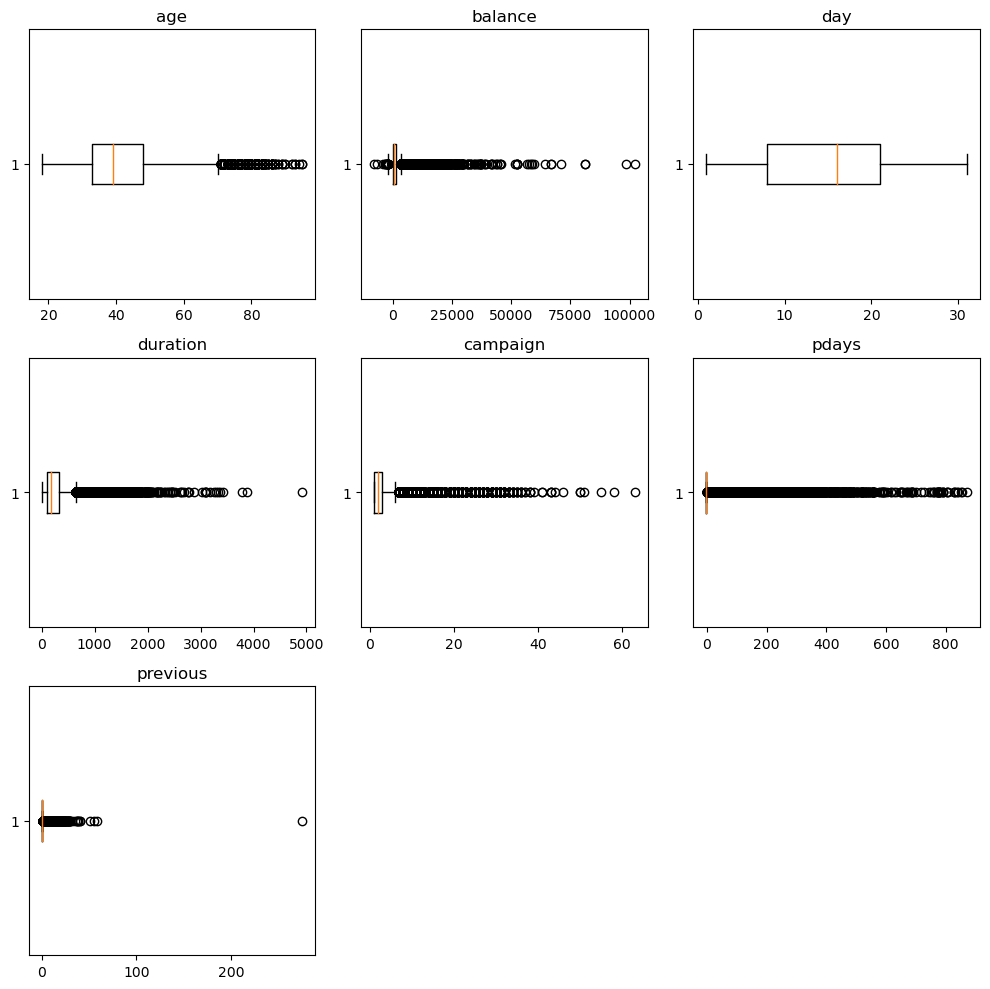

In [ ]:
# Plotting box plots and looking for outliers
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include = ['int64','float64']).columns

plt.figure(figsize = (10,10))

for i, j in enumerate(numerical_columns, 1):
        plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
        plt.boxplot(data[j], vert = False)
        plt.title(j)

plt.tight_layout()
plt.show()


Found some extremely high outliers in balance, previous, duratin and campaigns

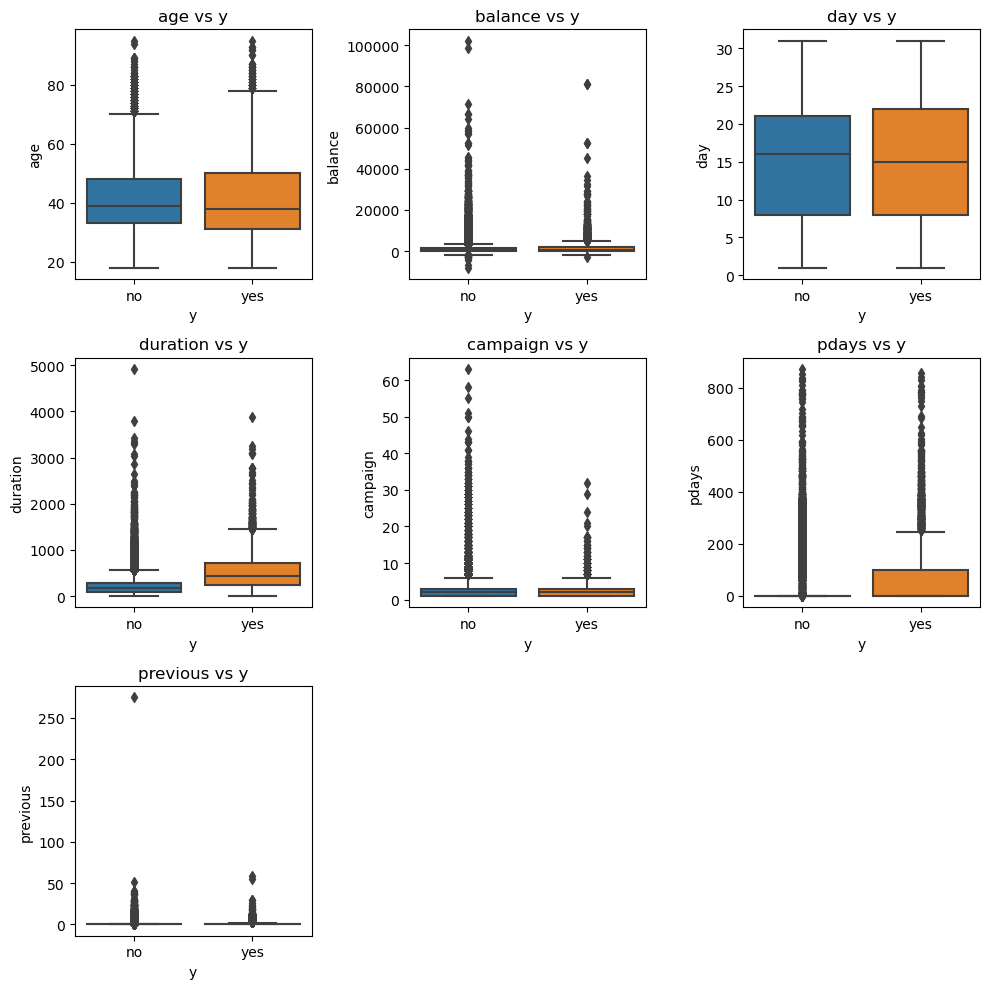

In [ ]:
# Check the relationship between the outliers and the target variable y. Remove if not significant

# Numeric
import seaborn as sns

plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.boxplot(x='y', y=col, data=data)
    plt.title(f'{col} vs y')

plt.tight_layout()
plt.show()


After comparison, found an extremely unreasonable value in 'previous'
However, it has no significant impact on the overall distribution, so remove it
Found that in the 'DAY' feature, the difference between 'yes' and 'no' is not significant
It can be removed as it does not serve as a useful feature



In [ ]:
# Remove >100 from previous, and day

data = data[data['previous'] <= 100]
data = data.drop(columns = ['day'])


print(f"After deletion: {data.shape}")

删除后: (45210, 16)


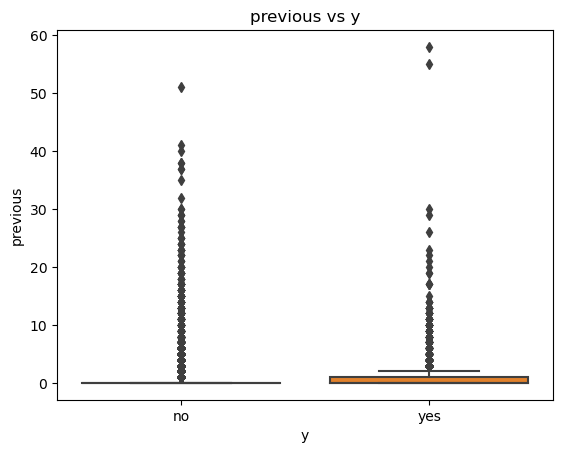

In [ ]:
sns.boxplot(x = 'y', y = 'previous', data = data)
plt.title('previous vs y')
plt.show()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact month  duration  campaign  pdays  previous poutcome   y  
0  unknown   may       261         1     -1         0  unknown  no  
1  unknown   may       151         1     -1         0  unknown  no  
2  unknown   may        76         1     -1         0  unknown  no  
3  unknown   may        92         1     -1         0  unknown  no  
4  unknown   may       198         1     -1         0  unknown  no  


E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


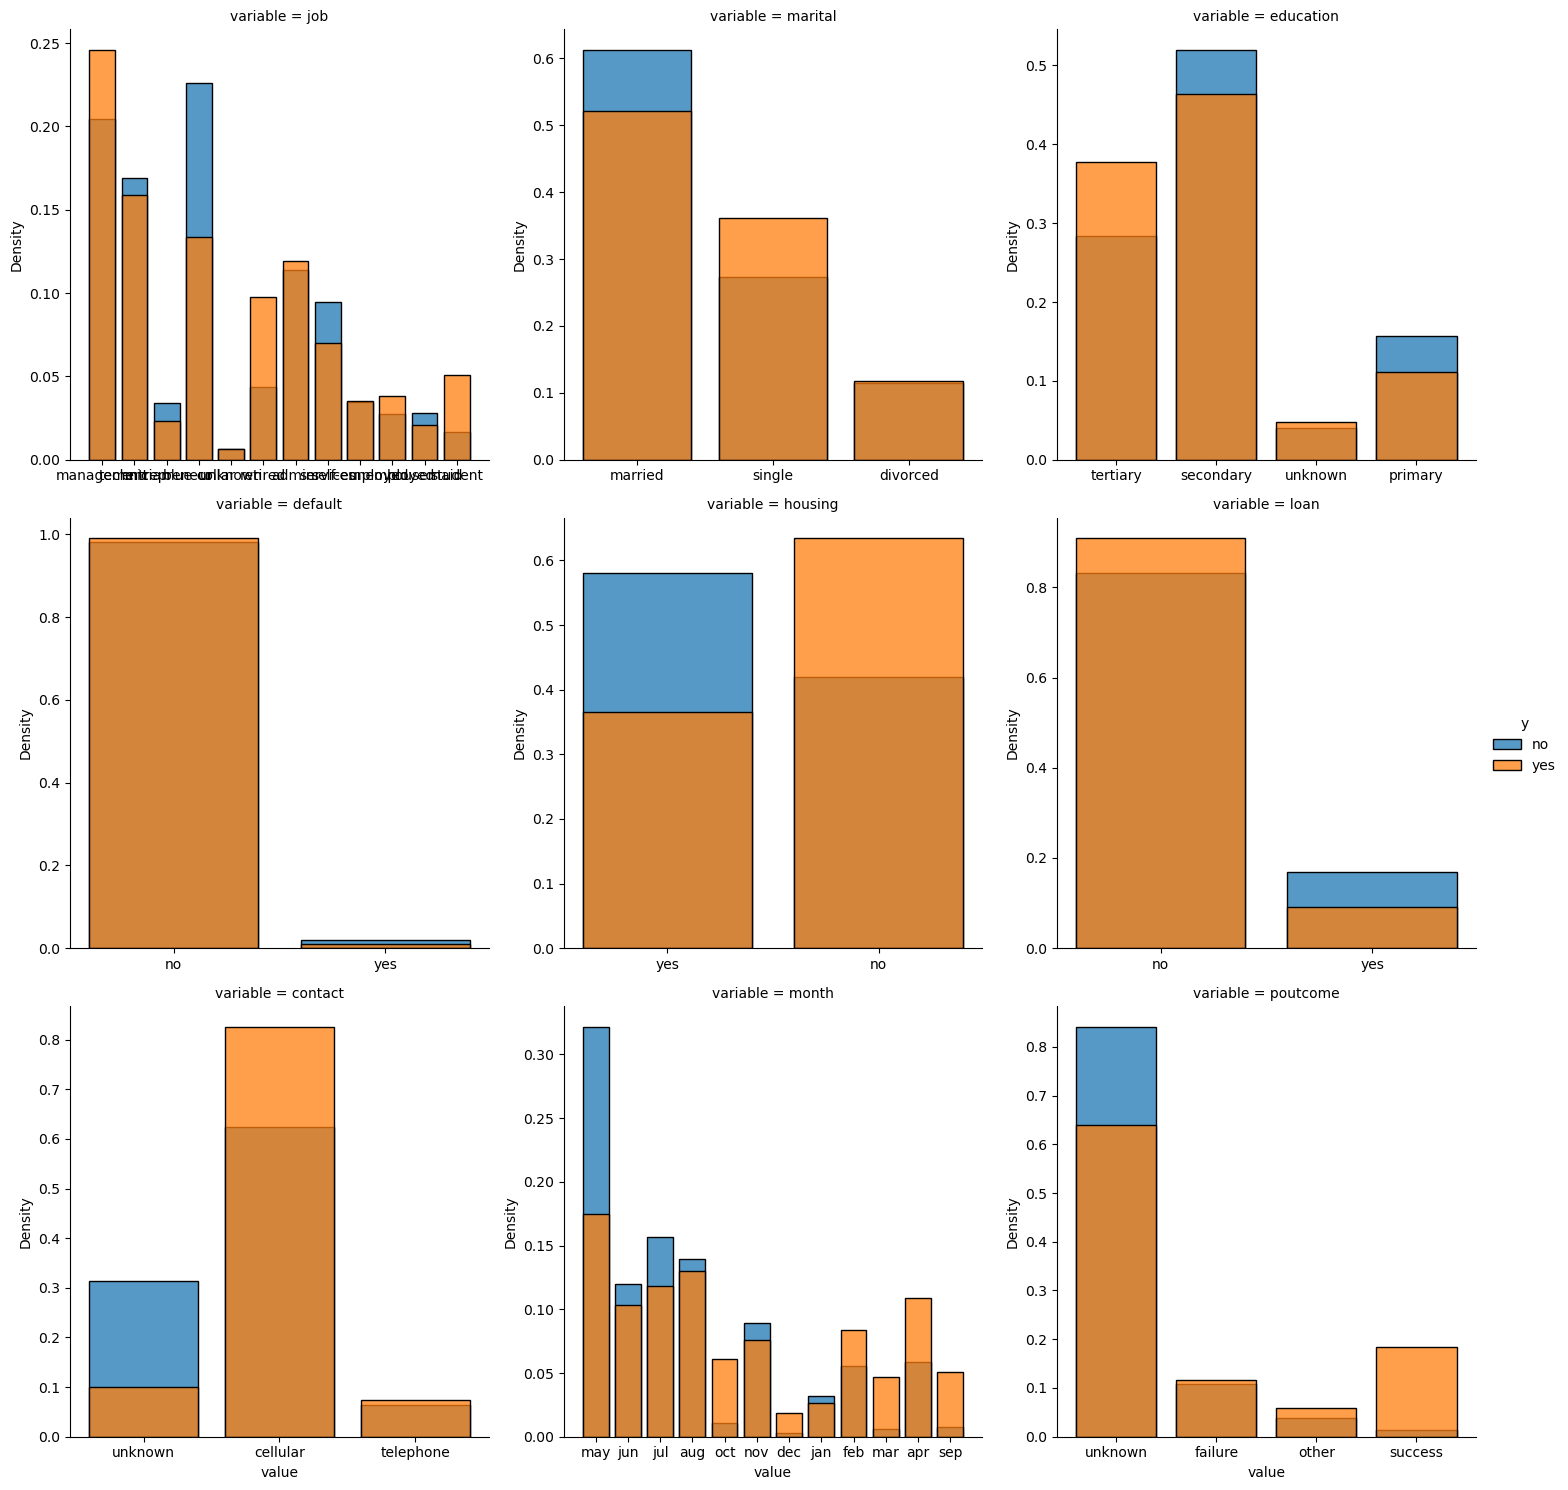

In [ ]:
# Perform the next step of feature engineering
#First perform a plot of non-numeric class features against y

#Reset indexes as day is removed
data.reset_index(drop = True, inplace = True)

print(data.head())

# Plotting non-numeric class relationships
categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome']
f = pd.melt(data, id_vars = 'y', value_vars = categorical_columns)

# Drawing Bar Charts with FacetGrid
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, height = 5, sharex = False, sharey = False, hue = 'y')
g.map(sns.histplot, 'value', stat = 'density', multiple = 'dodge', shrink = 0.8)

g.add_legend()
plt.savefig('Histogram of the distribution of taxonomic features.png', bbox_inches = 'tight')
plt.show()

The horizontal axis in each plot represents the different eigenvalues, and the colours represent the values of `y`.

The same colours in different bars add up to equal 1.

The `light orange` colour represents yes, and the `dark orange` part is the `blue` and `light orange` overlapped

The comparison reveals that the different eigenvalues in the `defaut feature` have little ability to discriminate the target variable y, so they are removed.

In [ ]:
data = data.drop(columns = ['default'])

In [ ]:
# Now change the feature value from a non-numeric type to a numeric type
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan',
                       'contact', 'month', 'poutcome', 'y']

# Create a mapping dictionary and apply the mapping
mappings = {}
for col in categorical_columns:

    unique_values = data[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    reverse_mapping = {idx: value for value, idx in mapping.items()}

    # Store maps and invert dictionaries
    mappings[col] = {'mapping': mapping, 'reverse_mapping': reverse_mapping}

    data[col] = data[col].map(mapping)

print(data.head())


   age  job  marital  education  balance  housing  loan  contact  month  \
0   58    0        0          0     2143        0     0        0      0   
1   44    1        1          1       29        0     0        0      0   
2   33    2        0          1        2        0     1        0      0   
3   47    3        0          2     1506        0     0        0      0   
4   33    4        1          2        1        1     0        0      0   

   duration  campaign  pdays  previous  poutcome  y  
0       261         1     -1         0         0  0  
1       151         1     -1         0         0  0  
2        76         1     -1         0         0  0  
3        92         1     -1         0         0  0  
4       198         1     -1         0         0  0  


In [ ]:
# Check mapping accuracy
print("Job| mapping:", mappings['job']['mapping'])
print("The unique value of Job:", data['job'].unique())


Job 映射: {'management': 0, 'technician': 1, 'entrepreneur': 2, 'blue-collar': 3, 'unknown': 4, 'retired': 5, 'admin.': 6, 'services': 7, 'self-employed': 8, 'unemployed': 9, 'housemaid': 10, 'student': 11}
Job 值的唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [ ]:
# Now that all the numericisation is complete, the normalisation operation follows
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = data.drop(columns = ['y'])
features_scaled = scaler.fit_transform(features)

data_scaled = pd.DataFrame(features_scaled, columns = features.columns)
data_scaled['y'] = data['y']
print(data_scaled.head())

        age       job   marital  education   balance   housing      loan  \
0  1.606945 -1.138112 -0.740679  -1.083586  0.256411 -0.893933 -0.436809   
1  0.288524 -0.815354  0.702439  -0.051567 -0.437896 -0.893933 -0.436809   
2 -0.747378 -0.492596 -0.740679  -0.051567 -0.446764 -0.893933  2.289329   
3  0.571043 -0.169839 -0.740679   0.980453  0.047199 -0.893933 -0.436809   
4 -0.747378  0.152919  0.702439   0.980453 -0.447092  1.118652 -0.436809   

    contact     month  duration  campaign     pdays  previous  poutcome  y  
0 -1.412086 -0.924821  0.011024  -0.56935 -0.411422 -0.300986 -0.415256  0  
1 -1.412086 -0.924821 -0.416115  -0.56935 -0.411422 -0.300986 -0.415256  0  
2 -1.412086 -0.924821 -0.707346  -0.56935 -0.411422 -0.300986 -0.415256  0  
3 -1.412086 -0.924821 -0.645217  -0.56935 -0.411422 -0.300986 -0.415256  0  
4 -1.412086 -0.924821 -0.233610  -0.56935 -0.411422 -0.300986 -0.415256  0  


      Feature  Importance
9    duration    0.306269
4     balance    0.128650
0         age    0.117777
8       month    0.088961
13   poutcome    0.067158
1         job    0.057232
11      pdays    0.052448
10   campaign    0.044068
3   education    0.029818
5     housing    0.027505
12   previous    0.024312
2     marital    0.023266
7     contact    0.021851
6        loan    0.010684


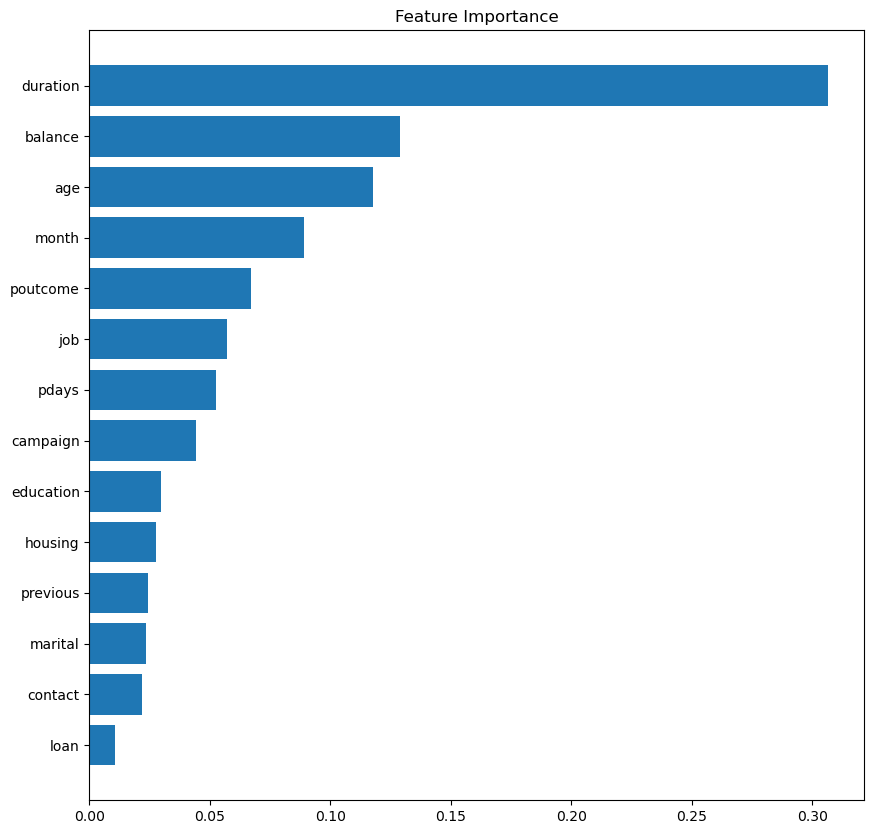

In [ ]:
# Begin further feature selection

# Use random forests to assess the importance of different features
from sklearn.ensemble import RandomForestClassifier

x = data_scaled.drop(columns = ['y'])
y = data_scaled['y']

model = RandomForestClassifier(random_state = 42)
model.fit(x,y)

# Shows the importance of eigenvalues
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
print( importance_df )

plt.figure(figsize = (10,10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.show()



In [ ]:
# Since there are so many features, the 10 that contributed the most were chosen first
selected_features = importance_df.head(10)['Feature'].tolist()
print("Selected Features: ", selected_features)

x_selected = data_scaled[selected_features]

选择的Features:  ['duration', 'balance', 'age', 'month', 'poutcome', 'job', 'pdays', 'campaign', 'education', 'housing']


In [ ]:
# Trying to use PCA to further screen for more important features
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(x_selected)

print("After the downgrade, there's still:", x_pca.shape[1])

降维后还剩: 9


**4. Selected models**
This project tested the following four classification models and compared their performance:

*   XGBoost
*   Random Forest
*   Logistic Regression
*   K-Nearest Neighbors (KNN)
## **Why Choose These Four Models?**  

  Our goal is to **predict whether a customer will subscribe to a term deposit** (a classification problem). The dataset includes **customer information, marketing campaign data, and historical marketing interactions**, with a mix of **numerical, categorical, and binary features**. These four models were chosen because they handle the data from different perspectives.  

  #### **1. XGBoost **
  - Suitable for **complex data**, capable of handling both numerical and categorical variables while automatically selecting the most important features.  
  - In a business context, customer decisions are influenced by multiple factors, and XGBoost effectively captures these **non-linear relationships**.  

  #### **2. Random Forest **
  - **Highly stable**, reduces overfitting, and handles **missing values and categorical variables**, making it well-suited for messy marketing data.  
  - Offers good interpretability, helping identify the key customer features that influence subscription decisions.  

  #### **3. Logistic Regression **
  - **Baseline model**, used to compare improvements gained from more complex models.  
  - Effective for **linear relationships**—if features like account balance and loan status have a direct impact on subscription, logistic regression can clearly reflect this.  

  #### **4. K-Nearest Neighbors (KNN) **
  - Tests whether **customer similarity affects subscription behavior**, e.g., whether customers with similar age and occupation tend to make the same decision.  
  - Provides a comparison with **tree-based models (XGBoost, RF) and linear models (LR)** to evaluate different classification approaches.  

  #### **Summary**
  - **XGBoost & Random Forest** are powerful for handling complex marketing data but require higher computational costs.  
  - **Logistic Regression** serves as a baseline model to check for linear patterns in customer behavior.  
  - **KNN** helps verify whether customer similarity affects subscription, offering insights into data structure.  

  By comparing different modeling approaches, we can identify the best model to optimize marketing strategies.  




**5. Indicators for model evaluation**

Why use these indicators for model evaluation?
In this project, our goal is to predict whether a customer will subscribe to a time deposit, which is a **binary classification problem** (subscribe `‘yes’` or not subscribe `‘no’`). In order to fully evaluate the performance of the model, we use **AUC, Accuracy, Recall** as the main evaluation metrics. Here are the reasons why we chose these metrics:

---

**1. AUC (Area Under the ROC Curve)

**Why did we choose AUC? **
- Since data may have category imbalances, AUC, as a global measure of model performance, provides a more comprehensive assessment of model effectiveness without being affected by the extremes of the category distribution.

---

**2. Accuracy** **Why choose Accuracy?

**Why choose Accuracy? **
- Accuracy is the most intuitive assessment metric, indicating the proportion of model predictions that are correct.
- In the case of a more balanced distribution of data categories, the accuracy rate can effectively reflect the overall performance of the model.
- However, if there is a category imbalance in the dataset (e.g., the proportion of subscribers is much lower than the proportion of non-subscribers), then relying on the accuracy rate alone may lead to misleading conclusions. That's why I look at accuracy rates in conjunction with AUC scores.

---

**3. Recall Rate (Recall)**

**Why did you choose Recall? **
- Recall measures the  ability of the model**  to successfully identify all positive samples**, i.e. how many of the customers predicted to be ‘subscribers’ are actually target customers.
- In a bank marketing scenario, marketers are more interested in finding as many potential subscribers as possible, rather than simply improving the accuracy of their predictions.
- Low recall means that the model misses a large number of potential subscribers, which can lead to wasted marketing resources.

---

## **SUMMARY***
- **AUC** is used to assess the overall classification ability of the model and is particularly applicable to unbalanced datasets.
- **Accuracy** Provides a base measure, but may not be sufficient to assess the strengths and weaknesses of the model on its own.
- **Recall** is particularly important in marketing scenarios where banks are more interested in finding more potential customers than simply reducing misclassifications.


Therefore, in this project, we use a combination of these metrics to ensure that models are covered under different perspectives of evaluation, and ultimately select the model that maximises marketing success.




In [ ]:
# Since only one feature is reduced after PCA, it is better to choose ten to ensure that no information is lost

# Now for model screening, we use hyperparametric lattices, and cross-validation supplemented with metrics such as average accuracy, recall and auc curves to complete the model tuning participation screening.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

# Record results for final consolidated comparisons
evaluation_results = []
plt.figure(figsize=(8, 6))

# Random forest
# Use the hyperparameter grid to try the right parameters

param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
evaluation_results.append({'model': 'Random Forest', 'accuracy': accuracy_score(y_test, best_rf.predict(X_test)), 'recall rate': recall_score(y_test, best_rf.predict(X_test)), 'AUC': roc_auc_rf})

print("Random Forest optimal parameter:", grid_rf.best_params_)
print("Random Forest best rating:", grid_rf.best_score_)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")




NameError: name 'x_selected' is not defined

Fitting 5 folds for each of 27 candidates, totalling 135 fits


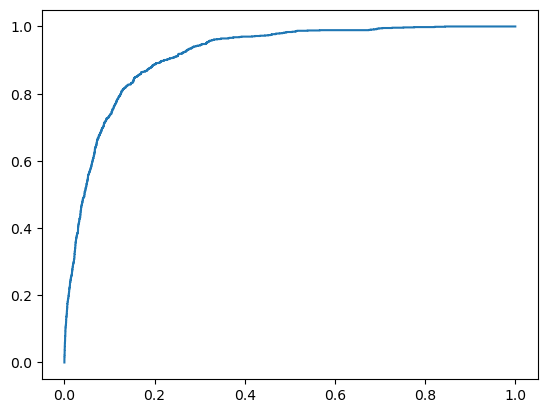

In [ ]:
# XGBoost

param_xgb = {'n_estimators': [50, 100, 200],
             'learning_rate': [0.01, 0.1, 0.2],
             'max_depth': [3, 5, 10]}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1)

grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
evaluation_results.append({'model': 'XGBoost', 'accuracy': accuracy_score(y_test, best_xgb.predict(X_test)), 'recall rate': recall_score(y_test, best_xgb.predict(X_test)), 'AUC': roc_auc_xgb})

print("XGBoost optimal parameter:", grid_xgb.best_params_)
print("XGBoost best rating:", grid_xgb.best_score_)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")

In [ ]:
#KNN
param_knn = {
    'n_neighbors': [10, 20, 30, 50, 70, 100],  # 更合理的 K 值范围
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

evaluation_results.append({
    'model': 'KNN',
    'accuracy': accuracy_score(y_test, best_knn.predict(X_test)),
    'recall rate': recall_score(y_test, best_knn.predict(X_test)),
    'AUC': roc_auc_knn
})

print("KNN optimal parameter:", grid_knn.best_params_)
print("KNN best rating:", grid_knn.best_score_)

plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")

NameError: name 'GridSearchCV' is not defined

Fitting 5 folds for each of 4 candidates, totalling 20 fits


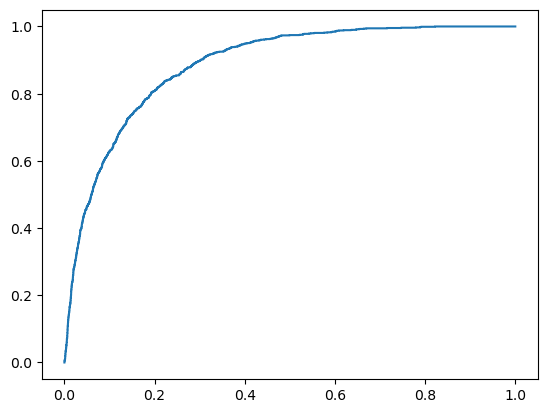

In [ ]:
# Logistic regression

param_lr = {'C': [0.01, 0.1, 1, 10]}

grid_lr = GridSearchCV(
    LogisticRegression(),
    param_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1)

grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
evaluation_results.append({'model': 'Logistic Regression', 'accuracy': accuracy_score(y_test, best_lr.predict(X_test)), 'recall rate': recall_score(y_test, best_lr.predict(X_test)), 'AUC': roc_auc_lr})

print("Logistic Regression optimal parameter:", grid_lr.best_params_)
print("Logistic Regression best rating:", grid_lr.best_score_)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")

We use Accuracy, Recall and AUC (Area under the ROC curve) for comparison.

Model comparison results.

模型评估结果:

+---------------------+----------+----------+----------+
| 模型                |   准确率 |   召回率 |      AUC |
+=====================+==========+==========+==========+
| XGBoost             | 0.900796 | 0.434584 | 0.914875 |
+---------------------+----------+----------+----------+
| Random Forest       | 0.900022 | 0.419945 | 0.91422  |
+---------------------+----------+----------+----------+
| Logistic Regression | 0.894382 | 0.301006 | 0.885907 |
+---------------------+----------+----------+----------+
| KNN                 | 0.891727 | 0.375114 | 0.84898  |
+---------------------+----------+----------+----------+


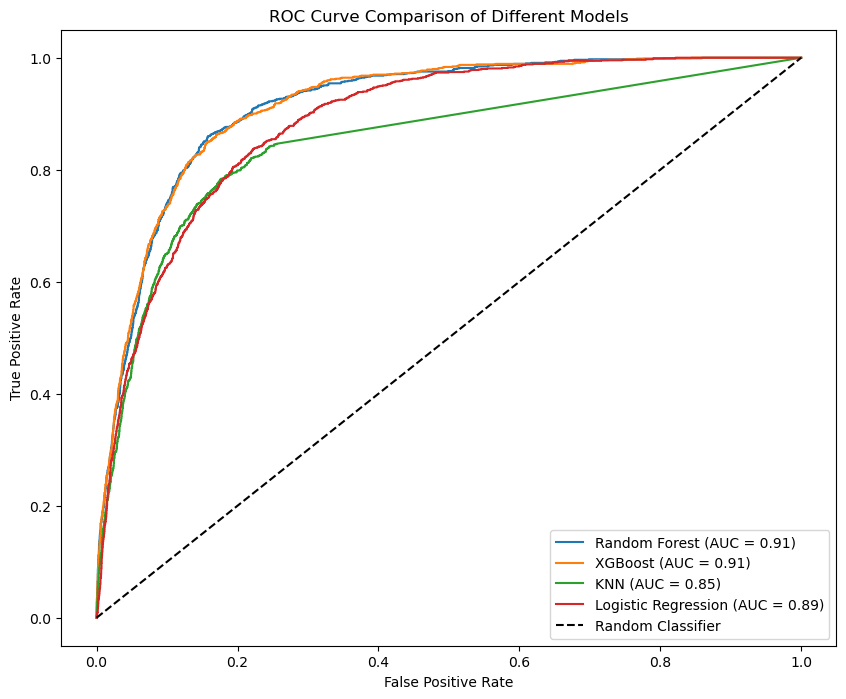

In [ ]:
# Make comparisons of results

# 1. Summary results matrix
from tabulate import tabulate
evaluation_df = pd.DataFrame(evaluation_results).sort_values(by='AUC', ascending=False)
print("Results of the model evaluation:\n")
print(tabulate(evaluation_df, headers='keys', tablefmt='grid', showindex=False))

# 2. Plot the ROC curve

plt.figure(figsize=(10, 8))


plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of Different Models")
plt.legend(loc="lower right")
plt.show()

## **Final Model Selection and Parameter Optimization**  

After comparing multiple models, we **selected XGBoost** as the best-performing model. XGBoost excels at handling **high-dimensional, nonlinear data**, automatically selecting important features, and improving classification performance through gradient boosting. It achieved strong results in terms of **accuracy, recall, and AUC**.  

---

### **Hyperparameter Optimization**  
To find the optimal parameters, we performed **grid search (GridSearchCV) with 5-fold cross-validation (cv=5)**, testing the following hyperparameters:  

- **n_estimators (Number of base learners)**: 50, 100, 200  
- **learning_rate (Learning rate)**: 0.01, 0.1, 0.2  
- **max_depth (Maximum tree depth)**: 3, 5, 10  

During cross-validation, we used **accuracy** as the scoring metric and selected the best parameter combination for training.  

---

### **Final Results**  
Using the best parameters, we trained the **optimized XGBoost model**, evaluated its performance on the test set, and plotted the **ROC curve** to assess the **AUC** score. The key results are:  

- **Best Parameters**: `grid_xgb.best_params_`  
- **Best Cross-Validation Score**: `grid_xgb.best_score_`  
- **Test Set Performance**:  
  - **Accuracy**: `accuracy_score(y_test, best_xgb.predict(X_test))`  
  - **Recall**: `recall_score(y_test, best_xgb.predict(X_test))`  
  - **AUC (Area Under ROC Curve)**: `auc(fpr_xgb, tpr_xgb)`  

XGBoost effectively distinguishes between **subscribed and non-subscribed customers**, making it the optimal model for our prediction task.  



## 6. Evaluation and Analysis

### (1) Key Findings
- **XGBoost and Random Forest** perform best in terms of **AUC (~0.91)**, indicating that they are the most effective in distinguishing subscribed from non-subscribed customers.
- **Random Forest** has a slightly higher **accuracy (0.900022)** but a lower recall compared to XGBoost.
- **Logistic Regression** achieves a relatively good **AUC (0.89)** but has the lowest recall, only **0.301**, indicating that it struggles to predict the positive class **(y='yes')**.
- **KNN** has the lowest **AUC (0.85)**, with relatively low accuracy and recall, making it unsuitable for this problem.

---

### (2) Conclusion
- **XGBoost** or **Random Forest** is recommended as the final model due to their **highest AUC and relatively high accuracy**.
- If the business requirement focuses more on **recall** (e.g., the bank aims to identify as many potential subscribers as possible), **tuning XGBoost’s hyperparameters** can help improve recall.
- **Logistic Regression and KNN** are not suitable for this problem as they have low recall and fail to effectively capture customers who **subscribe (y = 'yes')**.


## 7. Cross-Validation

We use **5-fold cross-validation** to fine-tune the model's hyperparameters.

### **Cross-Validation Process**
1. **Define hyperparameter combinations**: Including key parameters such as **the number of trees, learning rate, and maximum depth**.
2. **Data Splitting**: The dataset is divided into **5 parts**, where **4 parts are used for training and 1 part for validation**, repeated **5 times**.
3. **Model Selection**: The **accuracy** of each hyperparameter combination is calculated to select the best model.
4. **Final Training**: The model is trained using the **optimal hyperparameters** and evaluated on the test set, with an **ROC curve plotted** to assess performance.
